<a href="https://colab.research.google.com/github/kayceeprag/Final-data71200/blob/main/Project1Data72000Kelechi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

# Machine Learning Experiments on Wine Quality Dataset
**Project One**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -U scikit-learn==1.4
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


Importing dataset

In [ ]:
winedata = pd.read_csv('https://raw.githubusercontent.com/kayceeprag/Kelechi-Iwuagwu/main/winequality-white.csv', sep=';')

In [ ]:
print(winedata)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

# Spliting the data into training and testing sets


In [ ]:

train_set, test_set = train_test_split(winedata, test_size=0.2, random_state=42)



Verify the splits

In [ ]:
print(f'Training set size: {len(train_set)}')
print(f'Testing set size: {len(test_set)}')

Training set size: 3918
Testing set size: 980


Step 3: Explore your training set

In [ ]:
# Load the training set into a DataFrame
train_df = pd.DataFrame(train_set)
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4665,7.3,0.17,0.36,8.20,0.028,44.0,111.0,0.99272,3.14,0.41,12.4,6
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,5
3399,5.6,0.32,0.33,7.40,0.037,25.0,95.0,0.99268,3.25,0.49,11.1,6
843,6.9,0.19,0.35,1.70,0.036,33.0,101.0,0.99315,3.21,0.54,10.8,7
2580,7.7,0.30,0.26,18.95,0.053,36.0,174.0,0.99976,3.20,0.50,10.4,5


Summary statistic for training data.


In [ ]:
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 3918 entries, 4665 to 860
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3918 non-null   float64
 1   volatile acidity      3918 non-null   float64
 2   citric acid           3918 non-null   float64
 3   residual sugar        3918 non-null   float64
 4   chlorides             3918 non-null   float64
 5   free sulfur dioxide   3918 non-null   float64
 6   total sulfur dioxide  3918 non-null   float64
 7   density               3918 non-null   float64
 8   pH                    3918 non-null   float64
 9   sulphates             3918 non-null   float64
 10  alcohol               3918 non-null   float64
 11  quality               3918 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 397.9 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3918.000000       3918.000000  3918.000000  

Exploring Testing Data

In [ ]:
test_df = pd.DataFrame(test_set)
test_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4656,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,7
3659,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,8
907,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,8
4352,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,5
3271,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,7


Summary Statistics

In [ ]:
print(test_df.info())
print(test_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 4656 to 3661
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         980 non-null    float64
 1   volatile acidity      980 non-null    float64
 2   citric acid           980 non-null    float64
 3   residual sugar        980 non-null    float64
 4   chlorides             980 non-null    float64
 5   free sulfur dioxide   980 non-null    float64
 6   total sulfur dioxide  980 non-null    float64
 7   density               980 non-null    float64
 8   pH                    980 non-null    float64
 9   sulphates             980 non-null    float64
 10  alcohol               980 non-null    float64
 11  quality               980 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 99.5 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count     980.000000        980.000000   980.000000   

Check for missing values

In [ ]:
print(train_df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Visualize the Data in Your Training Set

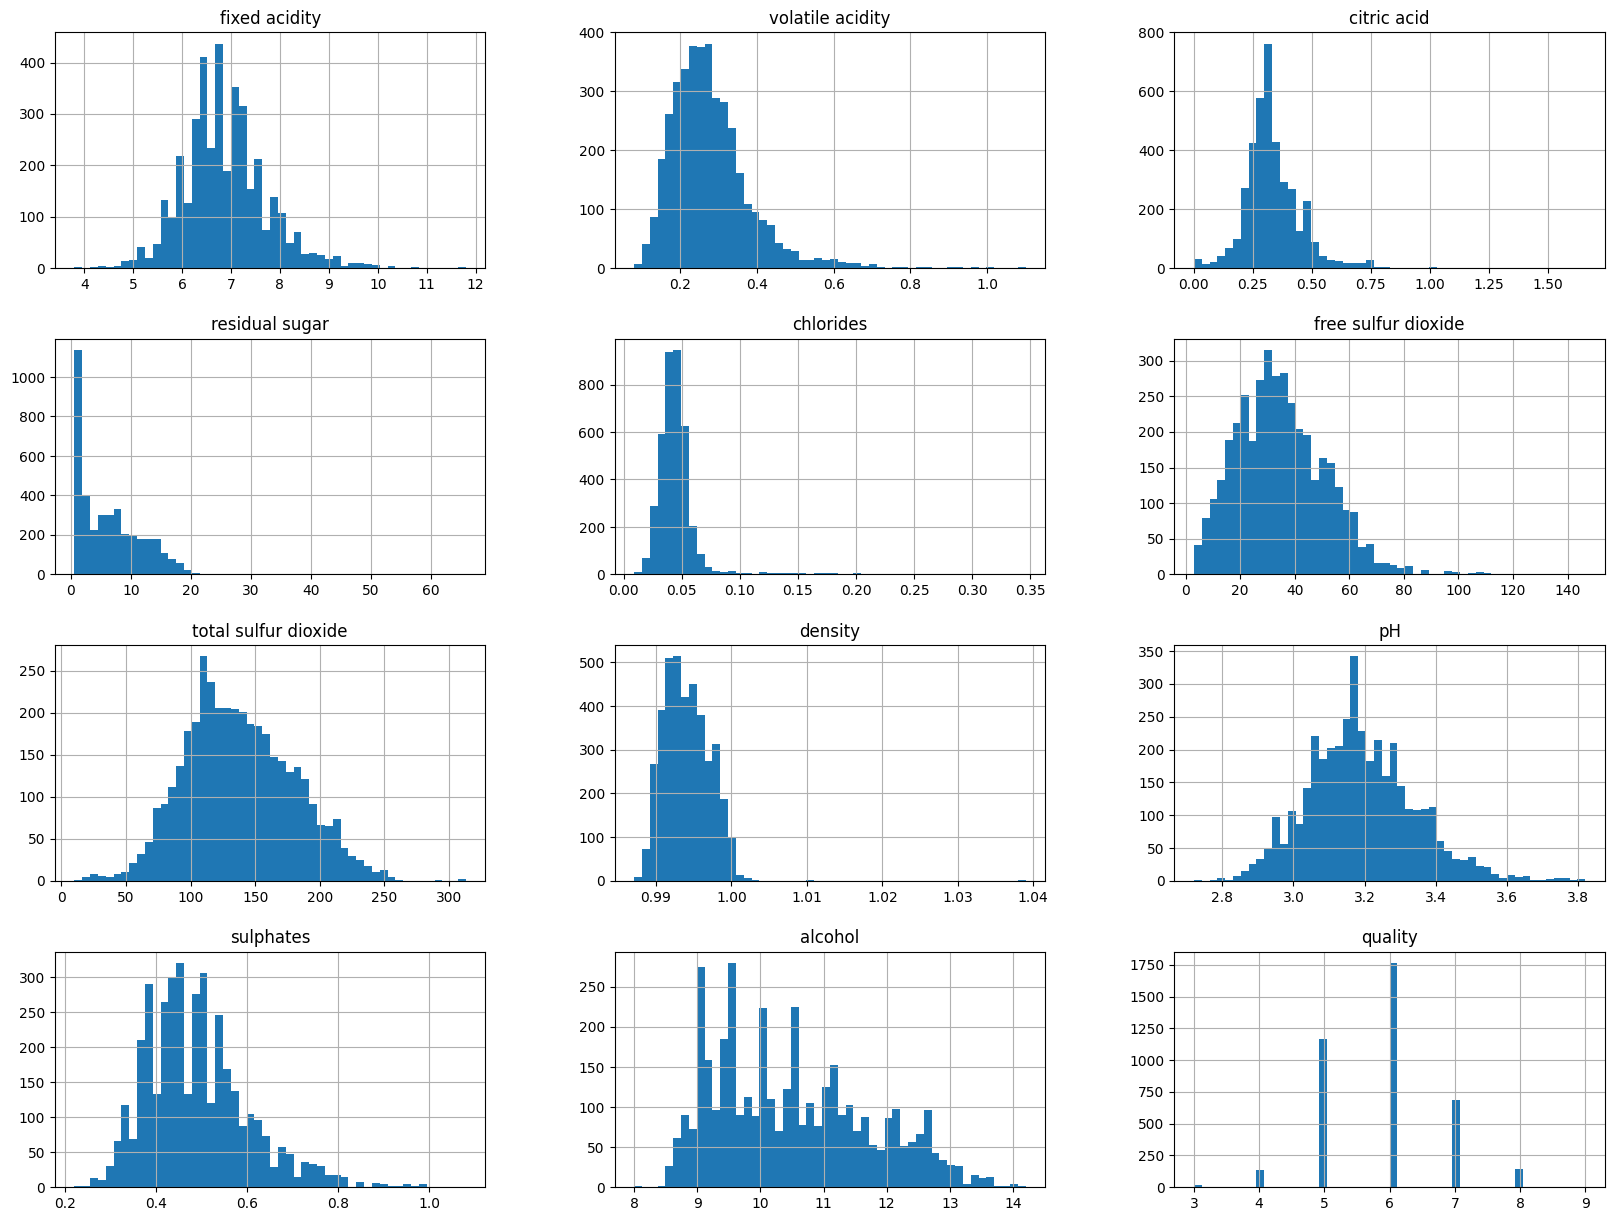

In [ ]:
train_df.hist(bins=50, figsize=(20,15))
plt.show()

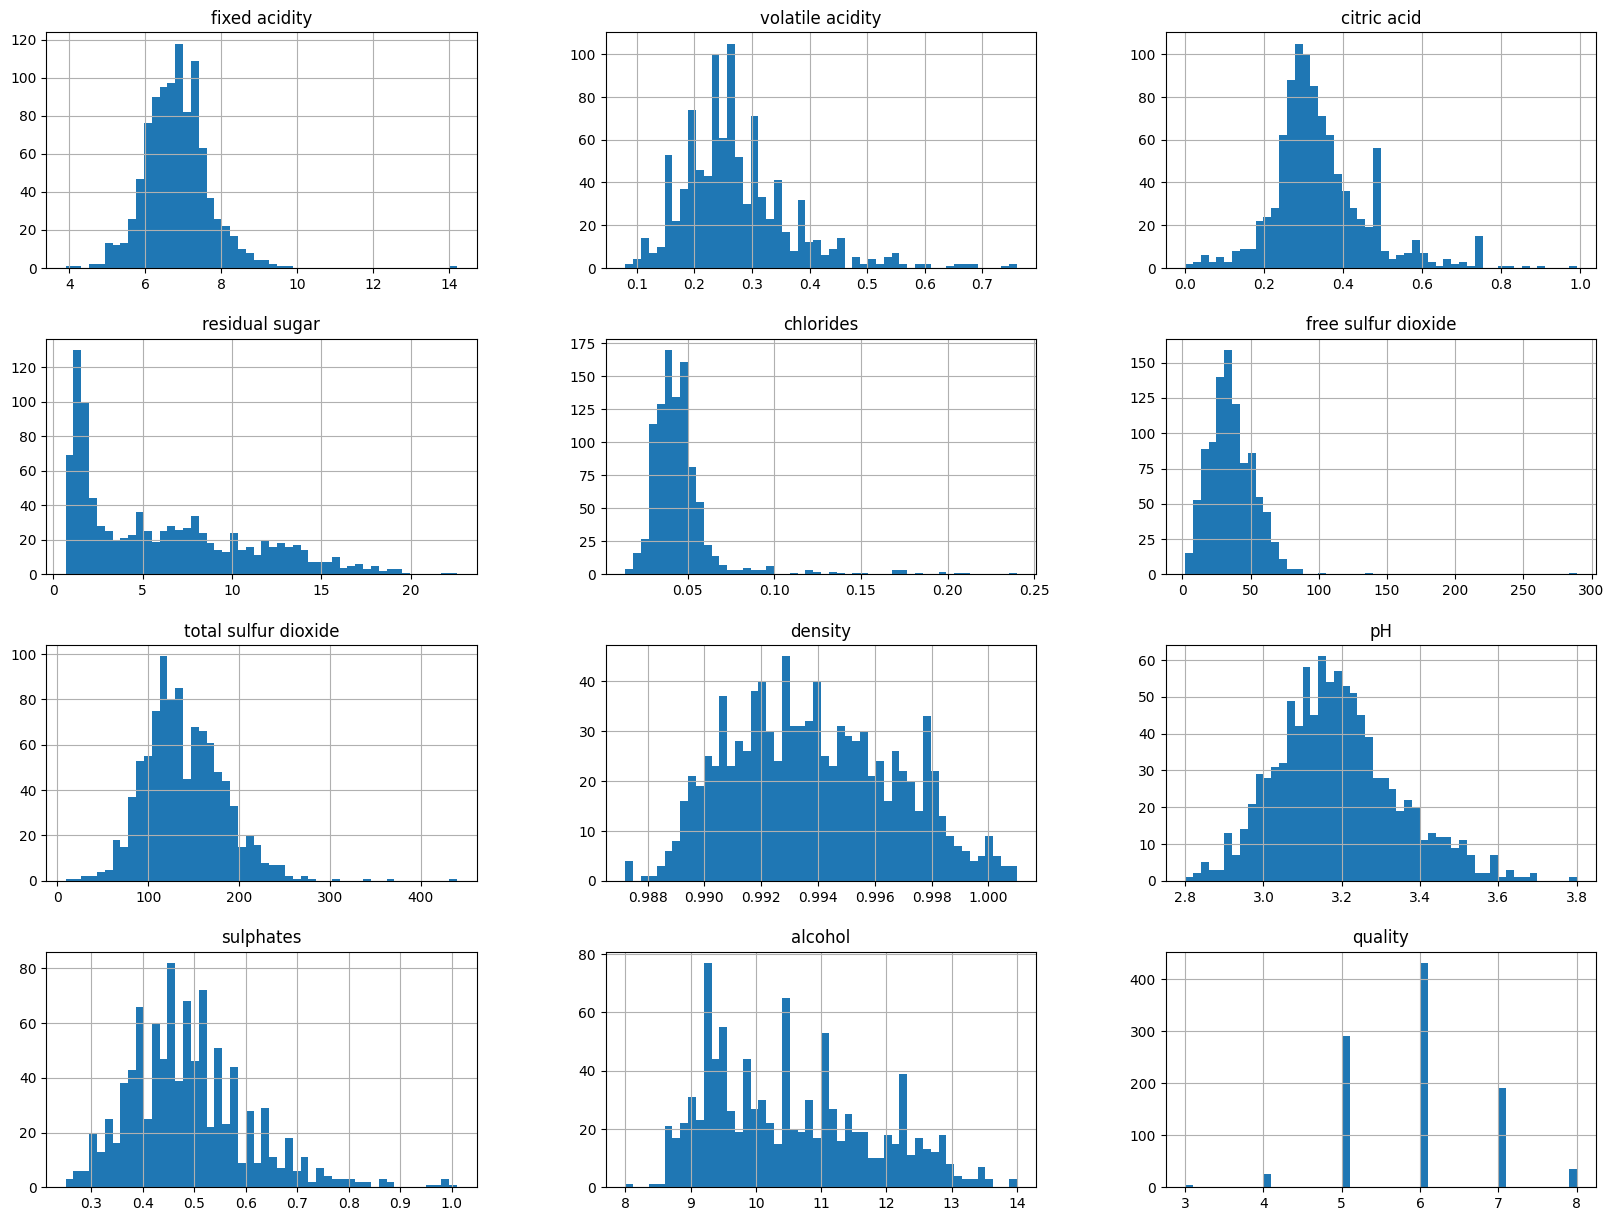

In [ ]:
test_df.hist(bins=50, figsize=(20,15))
plt.show()

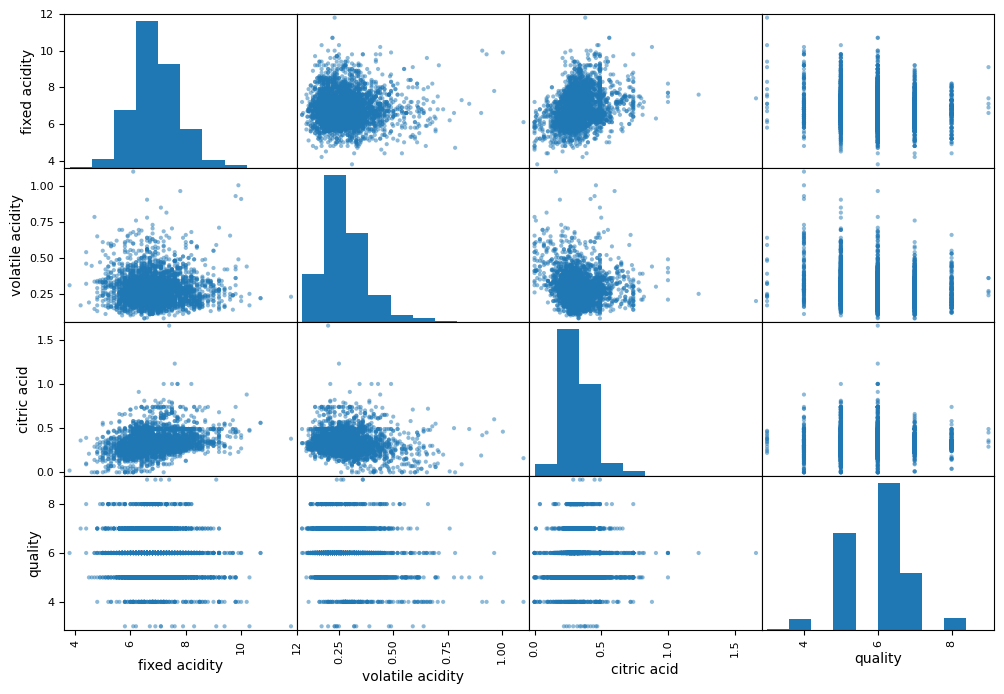

In [ ]:
attributes = ["fixed acidity", "volatile acidity", "citric acid", "quality"]
scatter_matrix(train_df[attributes], figsize=(12, 8))
plt.show()

**Apply transformations to your data**

Select two features to transform

Apply transformations

Plot histograms of the transformed features

Plot scatter matrices of the transformed features

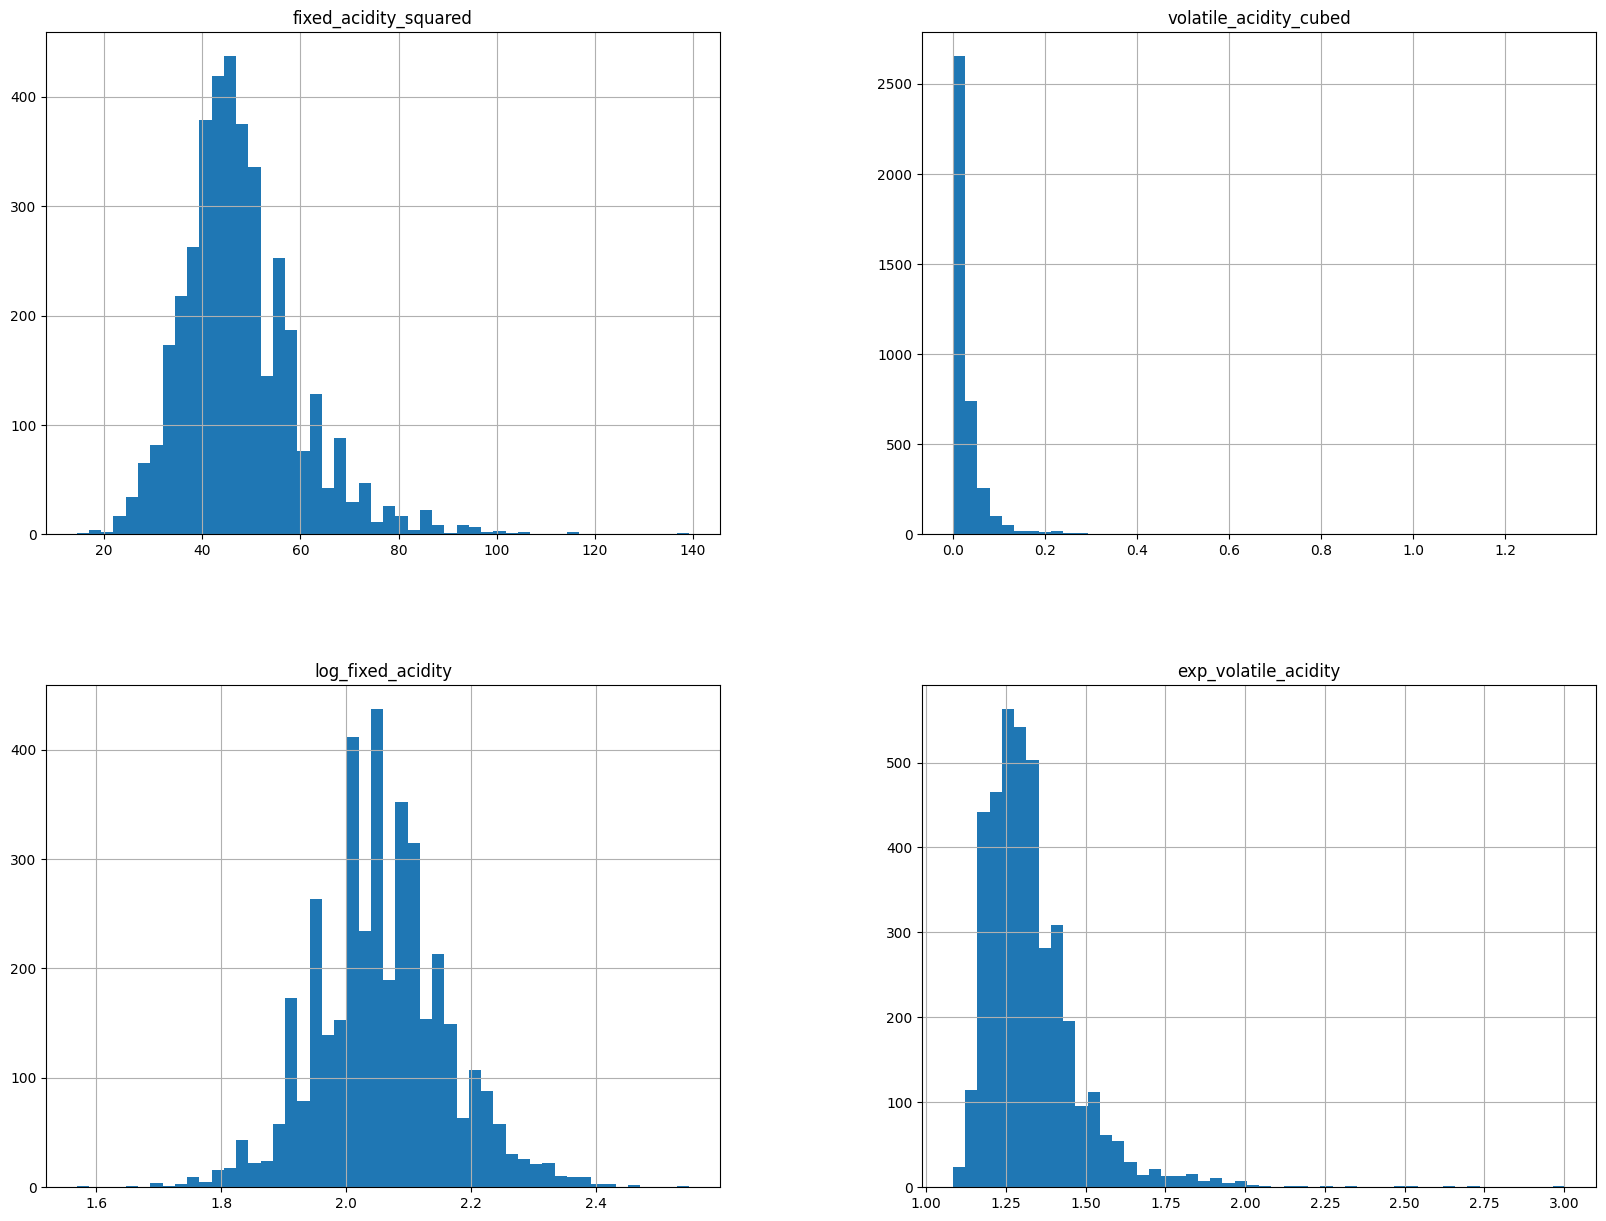

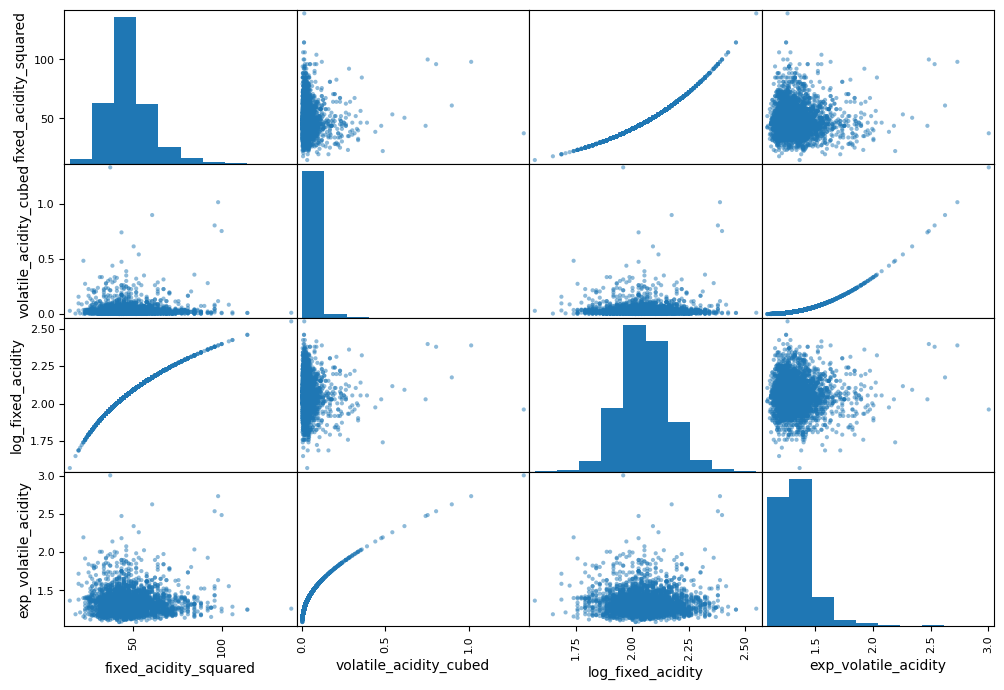

In [ ]:
features = ["fixed acidity", "volatile acidity"]

train_df_transformed = train_df.copy()
train_df_transformed["fixed_acidity_squared"] = train_df["fixed acidity"] ** 2
train_df_transformed["volatile_acidity_cubed"] = train_df["volatile acidity"] ** 3
train_df_transformed["log_fixed_acidity"] = np.log1p(train_df["fixed acidity"])
train_df_transformed["exp_volatile_acidity"] = np.exp(train_df["volatile acidity"])


train_df_transformed[["fixed_acidity_squared", "volatile_acidity_cubed", "log_fixed_acidity", "exp_volatile_acidity"]].hist(bins=50, figsize=(20,15))
plt.show()


scatter_matrix(train_df_transformed[["fixed_acidity_squared", "volatile_acidity_cubed", "log_fixed_acidity", "exp_volatile_acidity"]], figsize=(12, 8))
plt.show()